In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from ipyleaflet import *

In [2]:
# magic function making plot outputs appear within the notebook
%matplotlib inline

# change the default plot output size
plt.rcParams['figure.figsize'] = [18, 8]

In [3]:
# get current working directory
cwd = os.getcwd()
data_dir = os.path.join(cwd, 'data')

# set input and output Excel files
in_nation = os.path.join(data_dir, 'OpioidsPerYearTotalAndRate.xlsx')
in_state = os.path.join(data_dir, 'OpioidRxRateByState.xlsx')
in_county = os.path.join(data_dir, 'OpioidRxRate_County.xlsx')
in_rate = os.path.join(data_dir, 'US_Opioid_OverdoseDeathsByState.xlsx')

## Opioid prescriptions for the US (2006-2017)

### Total prescriptions

In [5]:
df_nation_total_rx = pd.read_excel(in_nation, sheet_name='TotalRx')
df_nation_total_rx.head()

,Year,TotalPrescriptions,PrescriptionRatePer100People
0,2006,215917663,72.4
1,2007,228543773,75.9
2,2008,237860213,78.2
3,2009,243738090,79.5
4,2010,251088904,81.2


[Text(0, 0, '0'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '150,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '250,000,000'),
 Text(0, 0, '300,000,000')]

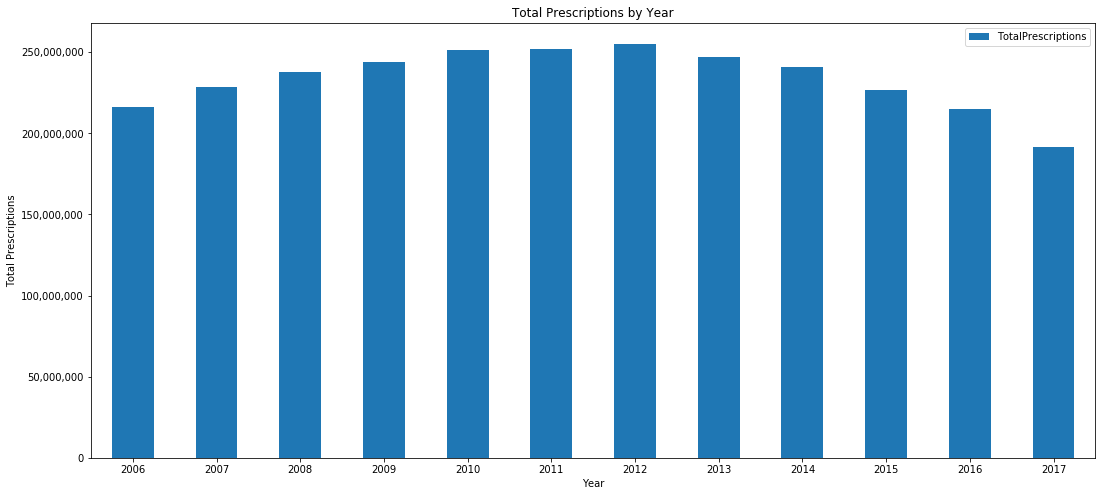

In [6]:
# Plot the trend by year
ax = df_nation_total_rx.plot.bar(x=0, y=1, title="Total Prescriptions by Year", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Total Prescriptions")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

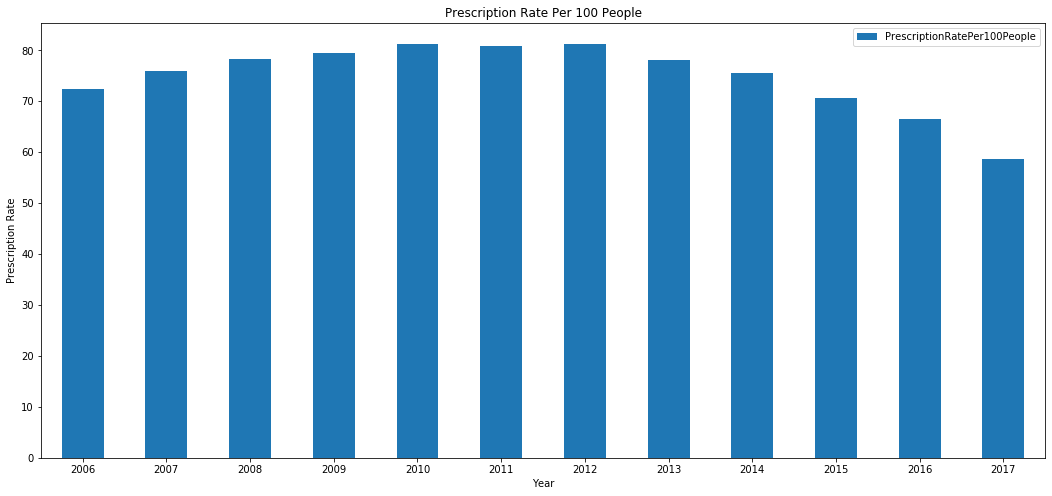

In [7]:
# Plot the trend by year
ax = df_nation_total_rx.plot.bar(x=0, y=2, title="Prescription Rate Per 100 People", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Prescription Rate")
vals = ax.get_yticks().astype(int)
# ax.set_yticklabels(['{:,}'.format(x) for x in vals])

### County participation

In [8]:
df_nation_county_ptcp = pd.read_excel(in_nation, sheet_name='CountyParticipation')
df_nation_county_ptcp.head()

,Year,TotalCounties,CountiesWithData,PercCountiesWithData
0,2006,3143,2754,87.6
1,2007,3143,2746,87.4
2,2008,3143,2758,87.8
3,2009,3143,2750,87.5
4,2010,3143,2741,87.2


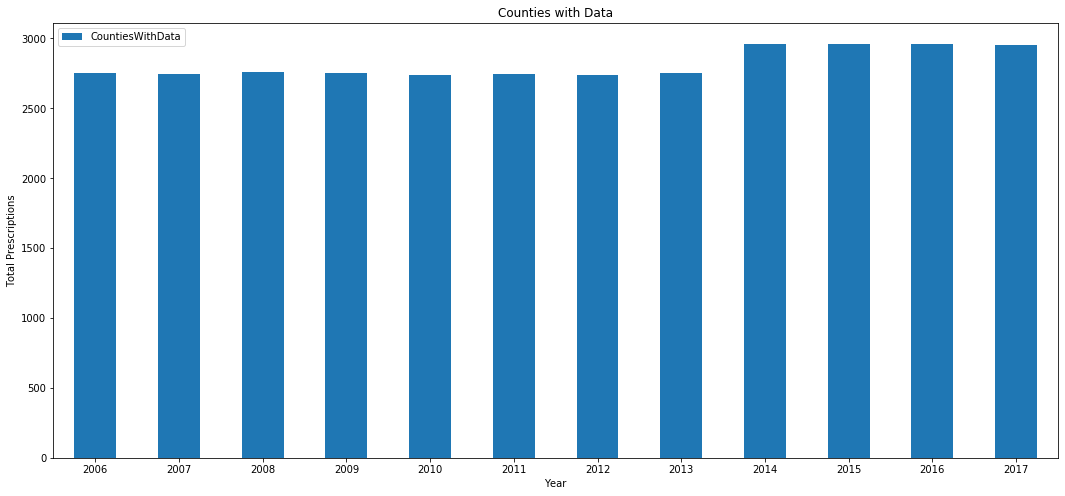

In [9]:
# Plot the trend by year
ax = df_nation_county_ptcp.plot.bar(x=0, y=2, title="Counties with Data", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Total Prescriptions")
vals = ax.get_yticks().astype(int)
# ax.set_yticklabels(['{:,}'.format(x) for x in vals])

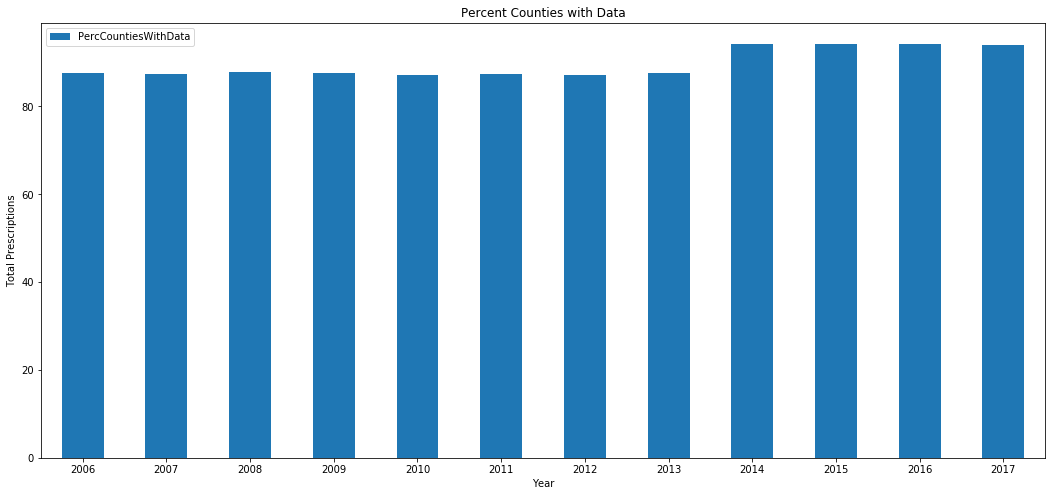

In [10]:
# Plot the trend by year
ax = df_nation_county_ptcp.plot.bar(x=0, y=3, title="Percent Counties with Data", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Total Prescriptions")
vals = ax.get_yticks().astype(int)

## Opioid Precriptions by State (2006-2017)

### Merging each yearly spreadsheet into a single spreadsheet

In [13]:
df_state = pd.read_excel(in_state, sheet_name=None, ignore_index=True)

df_template = pd.read_excel(in_state, sheet_name=0)

for index, key in enumerate(df_state.keys()):
    df_year = pd.read_excel(in_state, sheet_name=key)
    df_template[key] = df_year.iloc[:, 2]
        
df_state=df_template.drop(columns=['2006 Prescribing Rate'])
df_state.head()

,State,State ABBR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0,107.2
1,Alaska,AK,63.4,66.6,68.5,67.3,68.4,68.0,66.8,63.7,62.7,60.8,58.9,52.0
2,Arizona,AZ,74.3,77.8,80.9,84.2,88.5,88.6,85.3,80.4,79.7,75.5,70.2,61.2
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6,105.4
4,California,CA,51.0,53.6,55.1,55.6,55.8,55.9,56.4,54.4,52.7,47.7,44.8,39.5


In [14]:
df_state['mean'] = df_state.mean(axis=1)
df_state.head()

,State,State ABBR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0,107.2,128.258333
1,Alaska,AK,63.4,66.6,68.5,67.3,68.4,68.0,66.8,63.7,62.7,60.8,58.9,52.0,63.925000
2,Arizona,AZ,74.3,77.8,80.9,84.2,88.5,88.6,85.3,80.4,79.7,75.5,70.2,61.2,78.883333
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6,105.4,114.475000
4,California,CA,51.0,53.6,55.1,55.6,55.8,55.9,56.4,54.4,52.7,47.7,44.8,39.5,51.875000


In [33]:
out_state_file = in_state.replace(".xlsx", "_Merge.xlsx")
df_state.to_excel(out_state_file, index=False)

Text(0, 0.5, 'Prescription Rate')

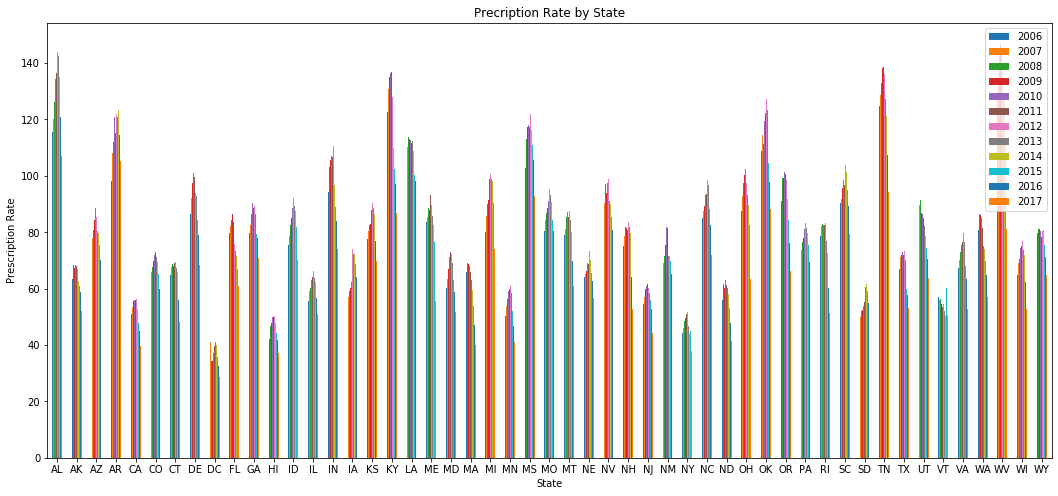

In [24]:
ax = df_state.plot.bar(x=1, y=range(2, 14), rot=0, title="Precription Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Prescription Rate")

In [25]:
df_state_sort = df_state.sort_values(by='mean', ascending=False)
df_state_sort.head()

,State,State ABBR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0,107.2,128.258333
48,West Virginia,WV,129.9,135.1,145.5,146.9,143.1,139.6,136.9,129.0,126.4,111.3,96.0,81.3,126.750000
42,Tennessee,TN,124.8,128.8,132.9,138.4,140.0,138.5,136.1,127.1,121.3,114.9,107.5,94.4,125.391667
17,Kentucky,KY,122.6,130.8,136.6,135.2,136.5,137.0,127.9,111.7,110.0,102.6,97.2,86.8,119.575000
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6,105.4,114.475000


Text(0, 0.5, 'Prescription Rate')

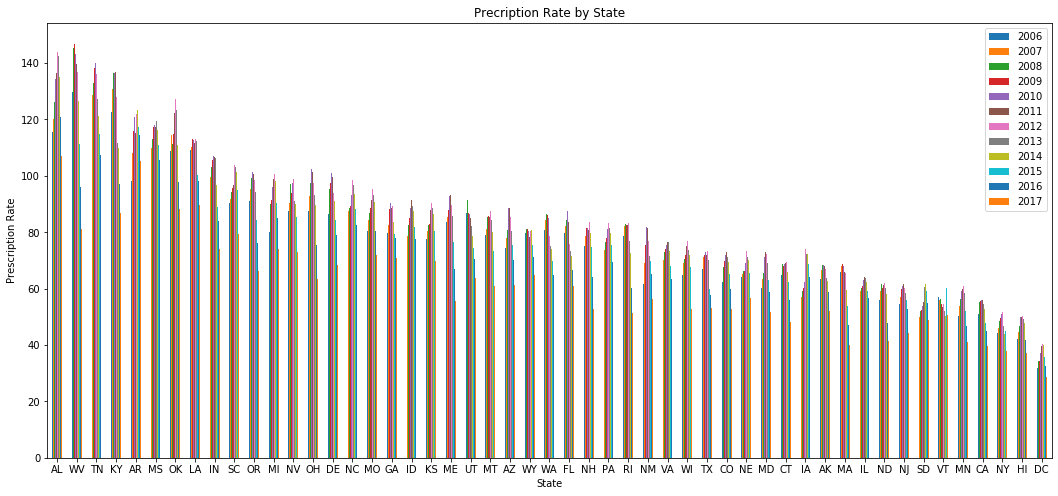

In [26]:
ax = df_state_sort.plot.bar(x=1, y=range(2, 14), rot=0, title="Precription Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Prescription Rate")

In [27]:
df_state_top10 = df_state_sort.head(10)
df_state_top10

,State,State ABBR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0,107.2,128.258333
48,West Virginia,WV,129.9,135.1,145.5,146.9,143.1,139.6,136.9,129.0,126.4,111.3,96.0,81.3,126.750000
42,Tennessee,TN,124.8,128.8,132.9,138.4,140.0,138.5,136.1,127.1,121.3,114.9,107.5,94.4,125.391667
17,Kentucky,KY,122.6,130.8,136.6,135.2,136.5,137.0,127.9,111.7,110.0,102.6,97.2,86.8,119.575000
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6,105.4,114.475000
24,Mississippi,MS,102.7,109.9,113.2,117.3,118.1,117.2,121.8,119.6,116.3,110.9,105.6,92.9,112.125000
36,Oklahoma,OK,108.7,114.4,111.3,115.0,119.6,122.3,127.4,123.3,110.9,104.4,97.9,88.1,111.941667
18,Louisiana,LA,109.2,110.1,113.7,113.0,112.6,111.7,113.0,112.4,108.9,100.4,98.1,89.5,107.716667
14,Indiana,IN,94.3,99.7,103.3,105.6,107.1,106.7,110.5,106.3,96.7,89.1,83.9,74.2,98.116667
40,South Carolina,SC,90.4,91.7,94.1,95.8,98.6,96.8,104.0,103.0,101.3,95.1,89.4,79.3,94.958333


### Top 10 States with the highest prescription rate

Text(0, 0.5, 'Prescription Rate')

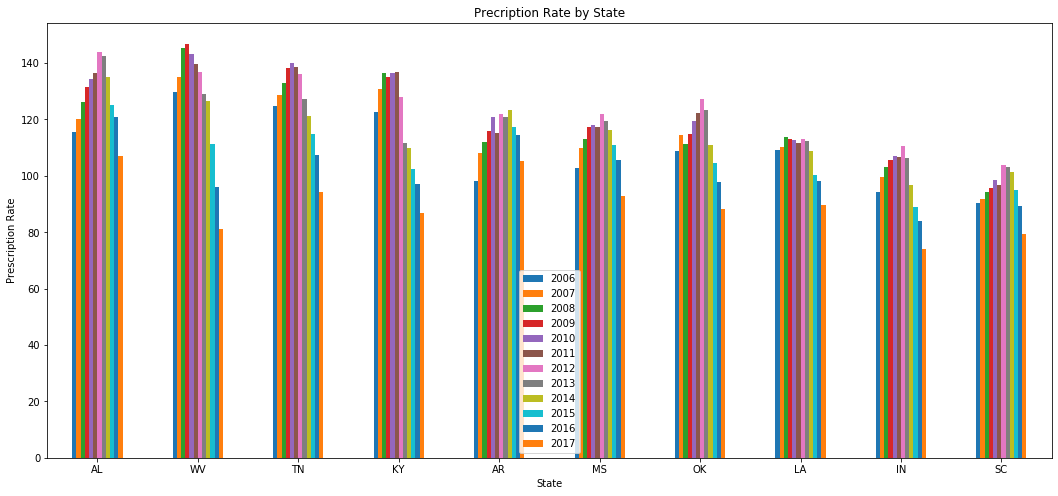

In [28]:
ax = df_state_top10.plot.bar(x=1, y=range(2, 14), rot=0, title="Precription Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Prescription Rate")

Text(0, 0.5, 'Prescription Rate')

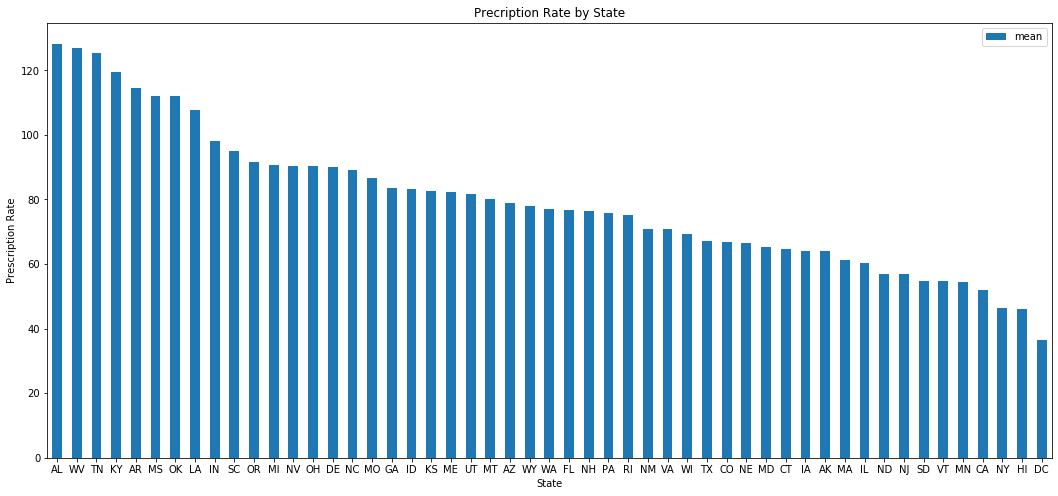

In [31]:
ax = df_state_sort.plot.bar(x=1, y=14, rot=0, title="Precription Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Prescription Rate")

## Opioid Precriptions by County (2006-2017)

In [120]:
df_county = pd.ExcelFile(in_county)
sheet_names =df_county.sheet_names
print(sheet_names)

num_sheets = len(df_county.sheet_names)
print(f"Total number of sheets: {num_sheets}")

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 'AllCounties2006-2017']
Total number of sheets: 13


In [121]:
sheet_template = df_county.parse(sheet_name=sheet_names[0])[["County", "State", "FIPS County Code"]]
sheet_template.head()

,County,State,FIPS County Code
0,"Autauga, AL",AL,1001
1,"Baldwin, AL",AL,1003
2,"Barbour, AL",AL,1005
3,"Bibb, AL",AL,1007
4,"Blount, AL",AL,1009


In [122]:
for sheet_name in sheet_names[:-1]:
    print(sheet_name)
    sheet_year = df_county.parse(sheet_name)
#     print(sheet_year.head()).
    sheet_template= pd.merge(sheet_template, sheet_year, how='left', on=['FIPS County Code'])
#     print(sheet_template.head())

sheet_template.head()

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


,County_x,State_x,FIPS County Code,County_y,State_y,2006 Prescribing Rate,County,State,2007 Prescribing Rate,County _x,...,2014 Prescribing Rate,County _y,State _y,2015 Prescribing Rate,County _x,State _x,2016 Prescribing Rate,County _y,State _y,2017 Prescribing Rate
0,"Autauga, AL",AL,1001,"Autauga, AL",AL,134.8,"Autauga, AL",AL,135.8,"Autauga, AL",...,145.3,"Autauga, AL",AL,129.9,"Autauga, AL",AL,129.6,AUTAUGA,AL,106.6
1,"Baldwin, AL",AL,1003,"Baldwin, AL",AL,127.8,"Baldwin, AL",AL,133.2,"Baldwin, AL",...,143.5,"Baldwin, AL",AL,132.1,"Baldwin, AL",AL,123.8,BALDWIN,AL,106.7
2,"Barbour, AL",AL,1005,"Barbour, AL",AL,78.1,"Barbour, AL",AL,72.7,"Barbour, AL",...,102.0,"Barbour, AL",AL,93.3,"Barbour, AL",AL,92.7,BARBOUR,AL,90.7
3,"Bibb, AL",AL,1007,"Bibb, AL",AL,114.3,"Bibb, AL",AL,116.1,"Bibb, AL",...,75.8,"Bibb, AL",AL,69.4,"Bibb, AL",AL,97.2,BIBB,AL,80.6
4,"Blount, AL",AL,1009,"Blount, AL",AL,40.3,"Blount, AL",AL,44.6,"Blount, AL",...,63.2,"Blount, AL",AL,57.9,"Blount, AL",AL,56.9,BLOUNT,AL,48.9


In [123]:
filter_col = ["County", "State", "FIPS County Code"] + [col for col in sheet_template if col.startswith('20')]
filter_col

['County',
 'State',
 'FIPS County Code',
 '2006 Prescribing Rate',
 '2007 Prescribing Rate',
 '2008 Prescribing Rate',
 '2009 Prescribing Rate',
 '2010 Prescribing Rate',
 '2011 Prescribing Rate',
 '2012 Prescribing Rate',
 '2013 Prescribing Rate',
 '2014 Prescribing Rate',
 '2015 Prescribing Rate',
 '2016 Prescribing Rate',
 '2017 Prescribing Rate']

In [124]:
df_county_merge = sheet_template[filter_col]
df_county_merge.head()

,County,State,FIPS County Code,2006 Prescribing Rate,2007 Prescribing Rate,2008 Prescribing Rate,2009 Prescribing Rate,2010 Prescribing Rate,2011 Prescribing Rate,2012 Prescribing Rate,2013 Prescribing Rate,2014 Prescribing Rate,2015 Prescribing Rate,2016 Prescribing Rate,2017 Prescribing Rate
0,"Autauga, AL",AL,1001,134.8,135.8,144.9,147.5,151.7,144.1,157.8,166.7,145.3,129.9,129.6,106.6
1,"Baldwin, AL",AL,1003,127.8,133.2,138.3,143.9,143.8,150.0,156.4,154.3,143.5,132.1,123.8,106.7
2,"Barbour, AL",AL,1005,78.1,72.7,79.6,88.5,97.0,99.4,118.3,107.5,102.0,93.3,92.7,90.7
3,"Bibb, AL",AL,1007,114.3,116.1,119.6,109.6,58.9,57.7,69.2,70.5,75.8,69.4,97.2,80.6
4,"Blount, AL",AL,1009,40.3,44.6,58.2,56.2,60.1,64.8,66.6,65.9,63.2,57.9,56.9,48.9


In [125]:
col_names = ["County", "State", "FIPS County Code"] + sheet_names[:-1]
print(col_names)

['County', 'State', 'FIPS County Code', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [126]:
df_county_merge.columns = col_names
df_county_merge['FIPS County Code']= df_county_merge['FIPS County Code'].astype(str)
df_county_merge['FIPS County Code'] = df_county_merge['FIPS County Code'].apply(lambda x: x.zfill(5))
df_county_merge.head()

/home/qiusheng/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/qiusheng/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,County,State,FIPS County Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Autauga, AL",AL,01001,134.8,135.8,144.9,147.5,151.7,144.1,157.8,166.7,145.3,129.9,129.6,106.6
1,"Baldwin, AL",AL,01003,127.8,133.2,138.3,143.9,143.8,150.0,156.4,154.3,143.5,132.1,123.8,106.7
2,"Barbour, AL",AL,01005,78.1,72.7,79.6,88.5,97.0,99.4,118.3,107.5,102.0,93.3,92.7,90.7
3,"Bibb, AL",AL,01007,114.3,116.1,119.6,109.6,58.9,57.7,69.2,70.5,75.8,69.4,97.2,80.6
4,"Blount, AL",AL,01009,40.3,44.6,58.2,56.2,60.1,64.8,66.6,65.9,63.2,57.9,56.9,48.9


In [127]:
df_county_merge['mean'] = df_county_merge.mean(axis=1)
df_county_merge.head()

/home/qiusheng/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,County,State,FIPS County Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,"Autauga, AL",AL,01001,134.8,135.8,144.9,147.5,151.7,144.1,157.8,166.7,145.3,129.9,129.6,106.6,141.225000
1,"Baldwin, AL",AL,01003,127.8,133.2,138.3,143.9,143.8,150.0,156.4,154.3,143.5,132.1,123.8,106.7,137.816667
2,"Barbour, AL",AL,01005,78.1,72.7,79.6,88.5,97.0,99.4,118.3,107.5,102.0,93.3,92.7,90.7,93.316667
3,"Bibb, AL",AL,01007,114.3,116.1,119.6,109.6,58.9,57.7,69.2,70.5,75.8,69.4,97.2,80.6,86.575000
4,"Blount, AL",AL,01009,40.3,44.6,58.2,56.2,60.1,64.8,66.6,65.9,63.2,57.9,56.9,48.9,56.966667


In [128]:
out_county_file = in_county.replace(".xlsx", "_Merge.xlsx")
df_county_merge.to_excel(out_county_file, index=False)

In [37]:
df_county = pd.read_excel(in_county, sheet_name=None, ignore_index=True)

df_template = pd.read_excel(in_county, sheet_name=0)
df_2007 = pd.read_excel(in_county, sheet_name=1)
# for index, key in enumerate(df_state.keys()):
#     df_year = pd.read_excel(in_state, sheet_name=key)
#     df_template[key] = df_year.iloc[:, 2]
        
# df_state=df_template.drop(columns=['2006 Prescribing Rate'])
df_template.head()

,County,State,FIPS County Code,2006 Prescribing Rate
0,"Autauga, AL",AL,1001,134.8
1,"Baldwin, AL",AL,1003,127.8
2,"Barbour, AL",AL,1005,78.1
3,"Bibb, AL",AL,1007,114.3
4,"Blount, AL",AL,1009,40.3


In [38]:
df_template.tail()

,County,State,FIPS County Code,2006 Prescribing Rate
3138,"Sweetwater, WY",WY,56037,97.2
3139,"Teton, WY",WY,56039,82.8
3140,"Uinta, WY",WY,56041,98.1
3141,"Washakie, WY",WY,56043,104.2
3142,"Weston, WY",WY,56045,71.7


In [39]:
df_2007.head()

,County,State,FIPS County Code,2007 Prescribing Rate
0,"Aleutians East, AK",AK,2013,-9999.0
1,"Aleutians West, AK",AK,2016,-9999.0
2,"Anchorage, AK",AK,2020,75.5
3,"Bethel, AK",AK,2050,-9999.0
4,"Bristol Bay, AK",AK,2060,-9999.0


In [42]:
df_county_merge = pd.merge(df_template, df_2007, on=['FIPS County Code'])
df_county_merge.head()

,County_x,State_x,FIPS County Code,2006 Prescribing Rate,County_y,State_y,2007 Prescribing Rate
0,"Autauga, AL",AL,1001,134.8,"Autauga, AL",AL,135.8
1,"Baldwin, AL",AL,1003,127.8,"Baldwin, AL",AL,133.2
2,"Barbour, AL",AL,1005,78.1,"Barbour, AL",AL,72.7
3,"Bibb, AL",AL,1007,114.3,"Bibb, AL",AL,116.1
4,"Blount, AL",AL,1009,40.3,"Blount, AL",AL,44.6


In [59]:
filter_col = [col for col in df_county_merge if col.startswith('200')]
filter_col

['2006 Prescribing Rate', '2007 Prescribing Rate']

In [60]:
filter_col.append("County_x")
filter_col.append("State_x")
filter_col.append("FIPS County Code")

In [61]:
df_county_merge[filter_col].head()

,2006 Prescribing Rate,2007 Prescribing Rate,County_x,State_x,FIPS County Code
0,134.8,135.8,"Autauga, AL",AL,1001
1,127.8,133.2,"Baldwin, AL",AL,1003
2,78.1,72.7,"Barbour, AL",AL,1005
3,114.3,116.1,"Bibb, AL",AL,1007
4,40.3,44.6,"Blount, AL",AL,1009
